<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Evaluaci%C3%B3n%20/M%C3%A9tricas%20de%20Evaluaci%C3%B3n/Metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import Series

Clase_objetivo='Pos'
#Clase real
real=pd.Series(['Pos','Pos','Neg','Neg','Neg','Pos','Pos','Pos','Pos','Pos','Neg','Pos','Neg','Pos','Neg'])

#Clase asignada por el modelo
predict=['Pos','Neg','Neg','Neg','Pos','Pos','Pos','Neg','Neg','Pos','Pos','Neg','Neg','Neg','Pos']

# Matriz de confusión

-- Estructura de datos (Matriz)
-- Gráfico (Con colores)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Estructura de datos
mC=confusion_matrix(real, predict, labels=['Pos','Neg']) #En lables, primero se pone la clase objetivo
print(mC)
print("TP:",mC[0][0])
print("FN:",mC[0,1])
print("FP:",mC[1,0])
print("TN:",mC[1,1])


[[4 5]
 [3 3]]
TP: 4
FN: 5
FP: 3
TN: 3


Para utilizar ConfusionMtrixDisplay necesitamos tener una estructura de datos con la matriz de confusión



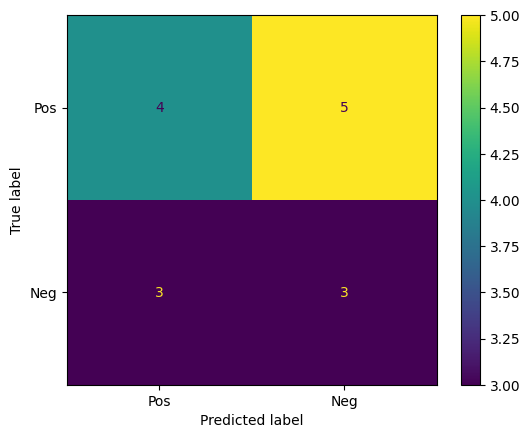

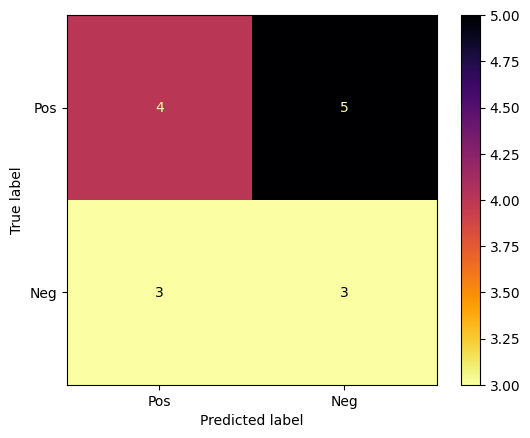

In [ ]:
#Primera versión
cmd=ConfusionMatrixDisplay(mC, display_labels=['Pos','Neg'])
cmd.plot()

#No necesitamos tener una estructura con los datos de la matriz
#Para Cmap hay mapas preestablecidos, solo basta poner el nombre
ConfusionMatrixDisplay.from_predictions(real,predict, labels=['Pos','Neg'],cmap='inferno_r')
plt.show()

# Métricas de evaluación

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
Clase_objetivo='Pos'

print("Exactitud:", accuracy_score(real,predict))

print("\nCon una clase de interés: POS")
print("Precision:", precision_score(real, predict, pos_label=Clase_objetivo))#pos_label=Clase de interés
print("Recall:", recall_score(real, predict, pos_label=Clase_objetivo))
print("F1:", f1_score(real, predict, pos_label=Clase_objetivo))


print("\nCon una clase de interés: NEG")
Clase_objetivo='Neg'
print("Precision:", precision_score(real, predict, pos_label=Clase_objetivo))#pos_label=Clase de interés
print("Recall:", recall_score(real, predict, pos_label=Clase_objetivo))
print("F1:", f1_score(real, predict, pos_label=Clase_objetivo))

print("\nSin una clase de interés: SIMPLE")
print("Precision:", precision_score(real, predict,average='macro'))
print("Recall:", recall_score(real, predict,average='macro'))
print("F1:", f1_score(real, predict,average='macro'))

print("\nSin una clase de interés: PONDERADO")
print("Precision:", precision_score(real, predict, average='weighted'))
print("Recall:", recall_score(real,predict,average='weighted'))
print("F1:", f1_score(real,predict, average="weighted"))


Exactitud: 0.4666666666666667

Con una clase de interés: POS
Precision: 0.5714285714285714
Recall: 0.4444444444444444
F1: 0.5

Con una clase de interés: NEG
Precision: 0.375
Recall: 0.5
F1: 0.42857142857142855

Sin una clase de interés: SIMPLE
Precision: 0.4732142857142857
Recall: 0.4722222222222222
F1: 0.4642857142857143

Sin una clase de interés: PONDERADO
Precision: 0.4928571428571428
Recall: 0.4666666666666667
F1: 0.4714285714285714


In [ ]:
from sklearn.metrics import classification_report
reporte=classification_report(real, predict, labels=['Pos','Neg'])
print(reporte)

              precision    recall  f1-score   support

         Pos       0.57      0.44      0.50         9
         Neg       0.38      0.50      0.43         6

    accuracy                           0.47        15
   macro avg       0.47      0.47      0.46        15
weighted avg       0.49      0.47      0.47        15



In [ ]:
from sklearn.metrics import classification_report
reporte=classification_report(real, predict, labels=['Pos','Neg'], output_dict=True)
print(reporte)
print(reporte['Neg']['recall'])
print(reporte['weighted avg']['f1-score'])

{'Pos': {'precision': 0.5714285714285714, 'recall': 0.4444444444444444, 'f1-score': 0.5, 'support': 9.0}, 'Neg': {'precision': 0.375, 'recall': 0.5, 'f1-score': 0.42857142857142855, 'support': 6.0}, 'accuracy': 0.4666666666666667, 'macro avg': {'precision': 0.4732142857142857, 'recall': 0.4722222222222222, 'f1-score': 0.4642857142857143, 'support': 15.0}, 'weighted avg': {'precision': 0.4928571428571428, 'recall': 0.4666666666666667, 'f1-score': 0.4714285714285714, 'support': 15.0}}
0.5
0.4714285714285714


#Experimentos con datos

In [ ]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

setInicial=pd.read_csv('Vinos_.csv')

#Dividir el conjunto de datos y clase
inicialDatos=setInicial.drop('quality', axis=1)

inicialClase=setInicial['quality']

#Generación de frames Entrenamiento/Evaluación
entrenamientoDatos, evaluacionDatos, entrenamientoClase, evaluacionClase=\
train_test_split(inicialDatos, inicialClase, test_size=0.3, stratify=inicialClase)

print("Datos de entrenamiento:", entrenamientoClase.value_counts())
print("Datos de evaluacion:", evaluacionClase.value_counts())
print(entrenamientoDatos.columns)

Datos de entrenamiento: quality
Cat_5    477
Cat_7    139
Name: count, dtype: int64
Datos de evaluacion: quality
Cat_5    204
Cat_7     60
Name: count, dtype: int64
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


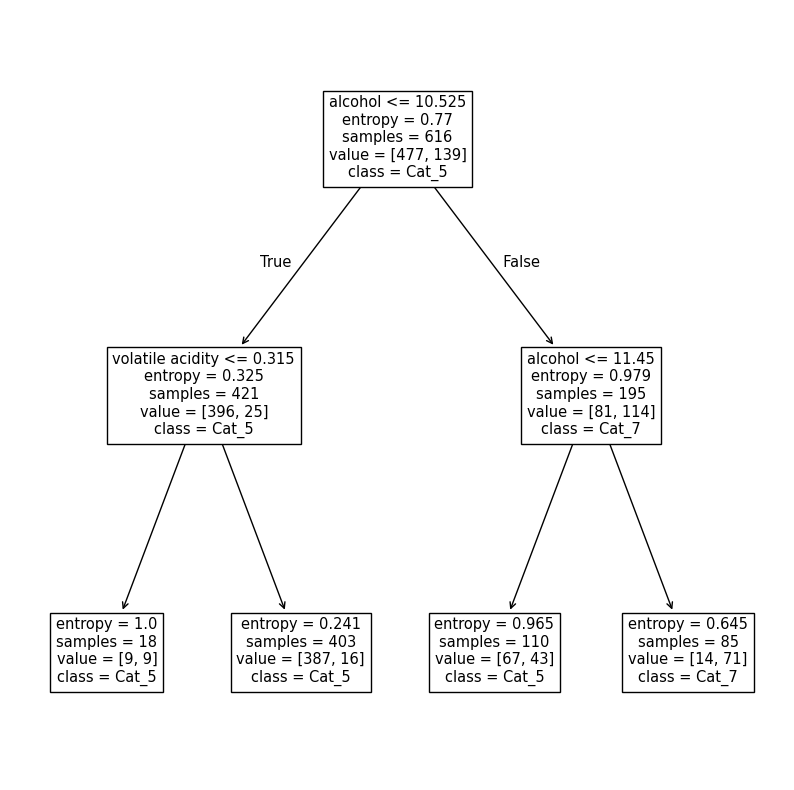

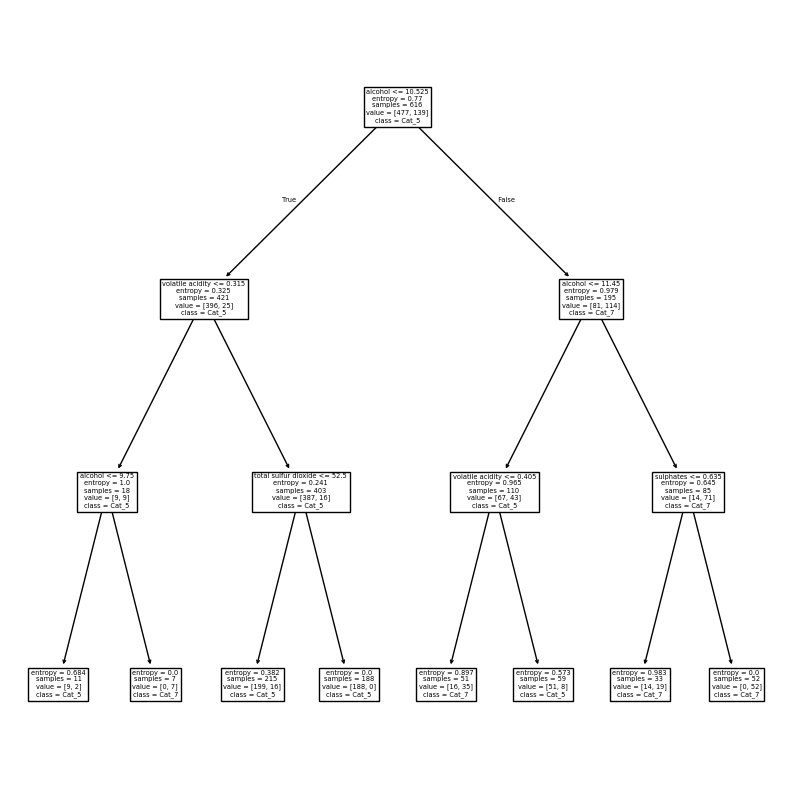

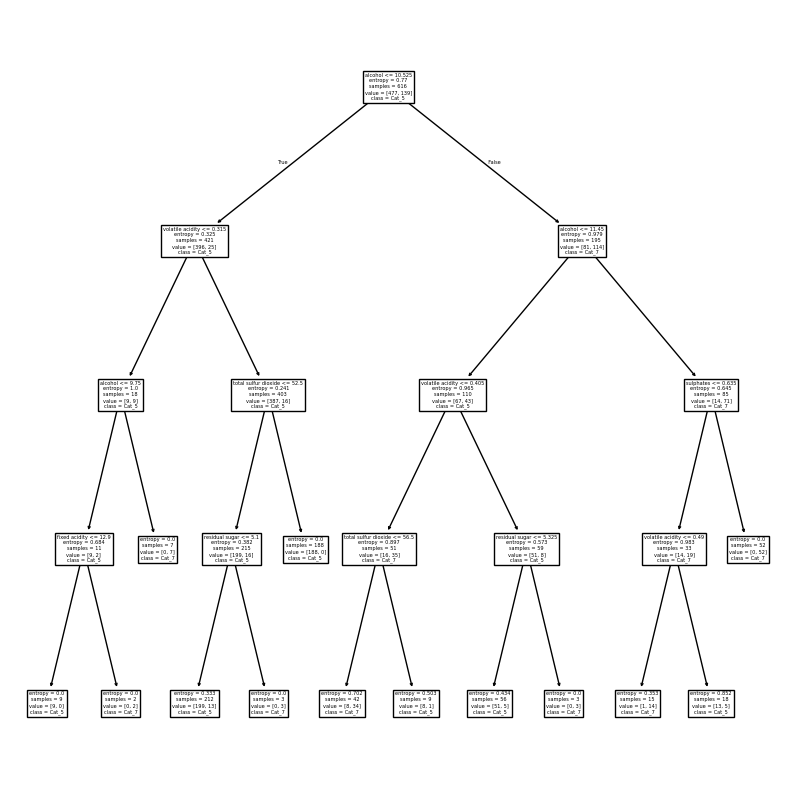

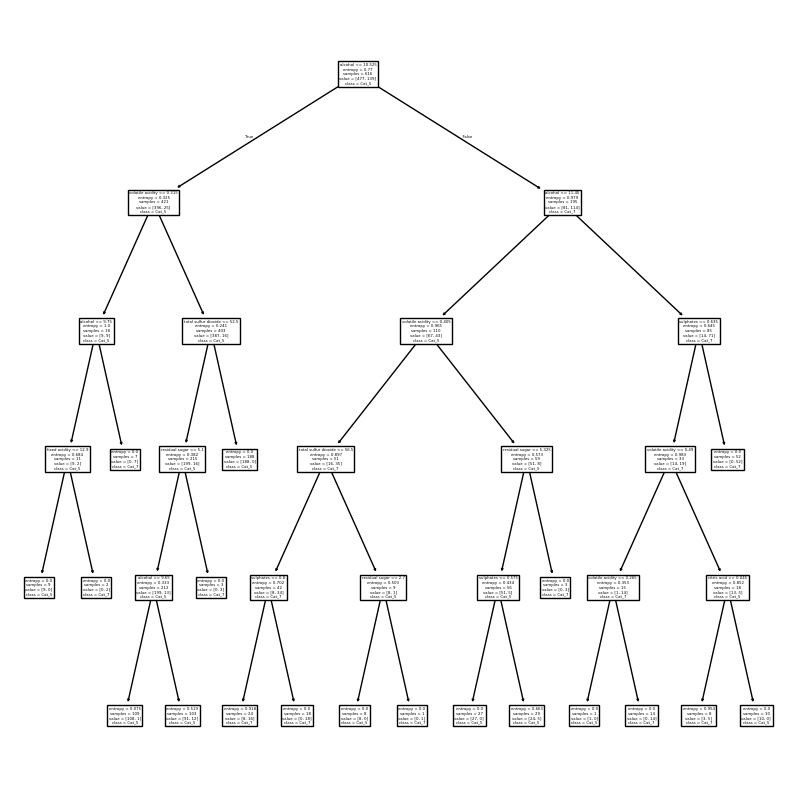

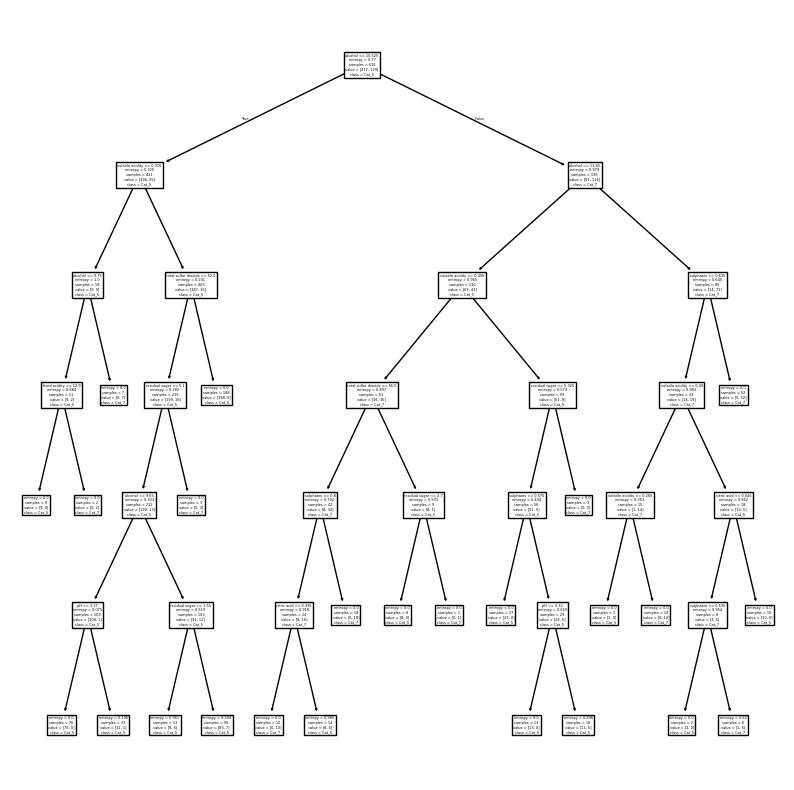

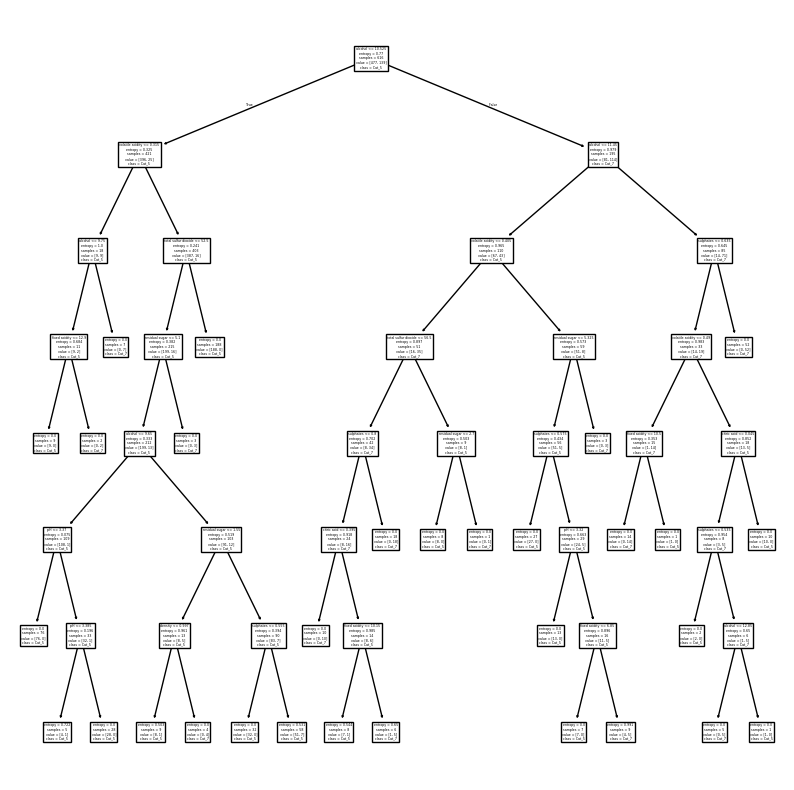

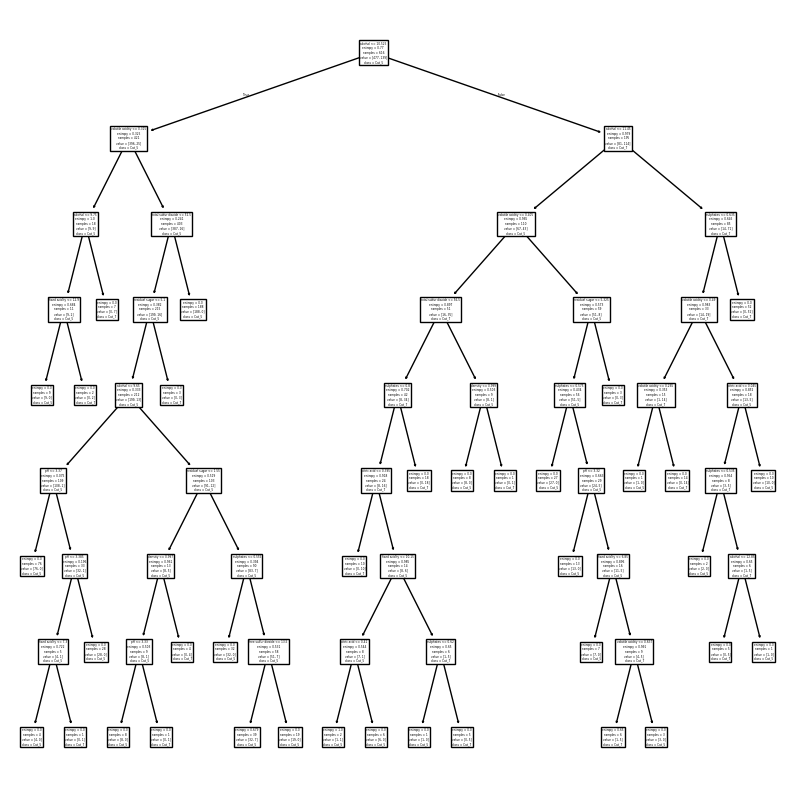

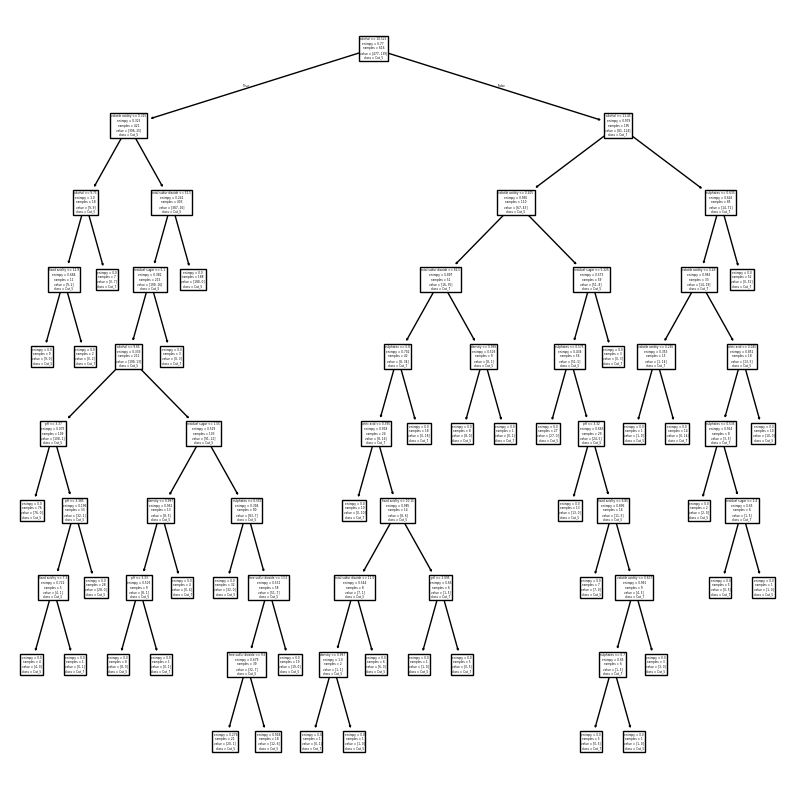

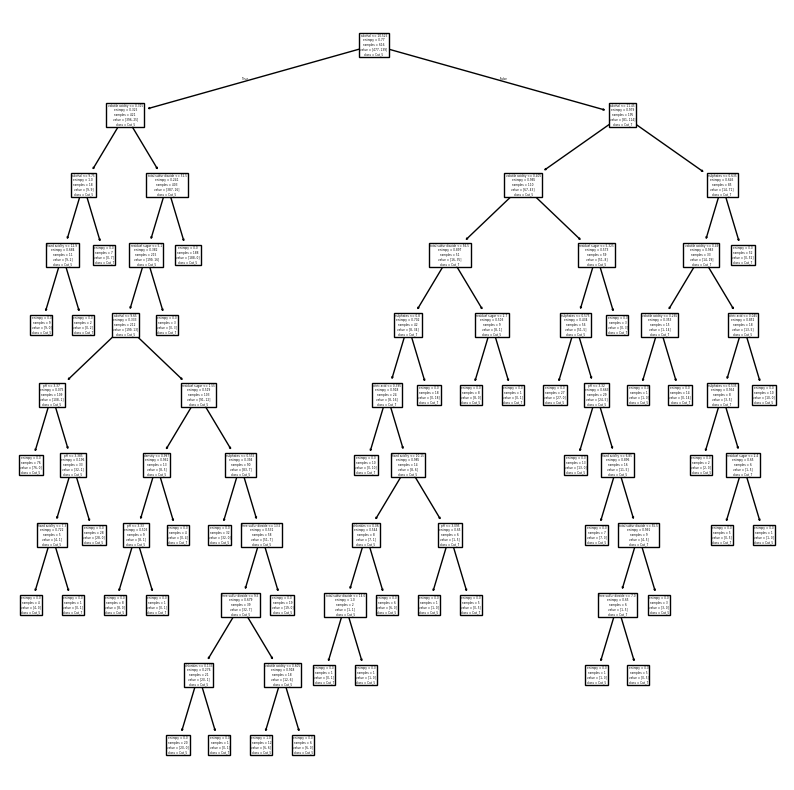

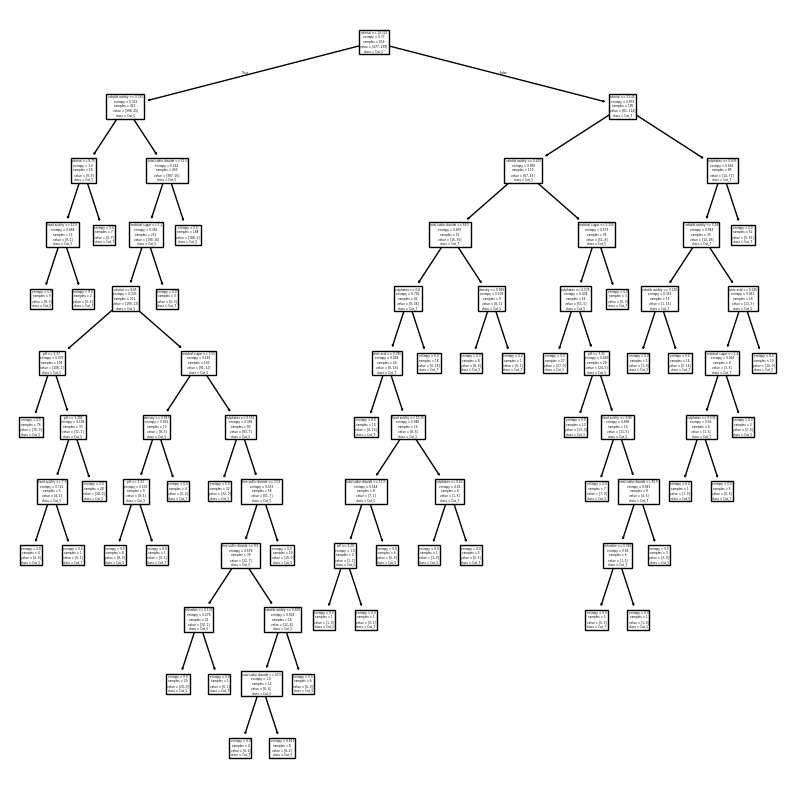

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import tree

profundidad = [2,3,4,5,6,7,8,9,10,11]
entrenamientoP = []
entrenamientoR = []
entrenamientoF = []
evaluacionP = []
evaluacionR = []
evaluacionF = []

for x in profundidad:
## Clasificador ##
  clasificador = DecisionTreeClassifier(criterion = "entropy", max_depth = x)
  # clasificador = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 55)

  ## Modelo ##
  modelo = clasificador.fit(entrenamientoDatos, entrenamientoClase)

  plt.figure(figsize = (10,10))
  tree.plot_tree(clasificador, feature_names = entrenamientoDatos.columns.to_list(), class_names = ['Cat_5','Cat_7'])
  plt.show()
  ## Clasificar ##
  predictEvaluacion = modelo.predict(evaluacionDatos)
  predictEntrenamiento = modelo.predict(entrenamientoDatos)

  ## Evaluar ##
  Clase_Objetivo = 'Cat_5'
  evaluacionP.append(precision_score(evaluacionClase, predictEvaluacion, pos_label = Clase_Objetivo))
  evaluacionR.append(recall_score(evaluacionClase,predictEvaluacion,pos_label=Clase_Objetivo))
  evaluacionF.append(f1_score(evaluacionClase,predictEvaluacion,pos_label=Clase_Objetivo))


  entrenamientoP.append(precision_score(entrenamientoClase, predictEntrenamiento, pos_label = Clase_Objetivo))
  entrenamientoR.append(recall_score(entrenamientoClase,predictEntrenamiento,pos_label=Clase_Objetivo))
  entrenamientoF.append(f1_score(entrenamientoClase,predictEntrenamiento,pos_label=Clase_Objetivo))

# Análisis de F1

[]

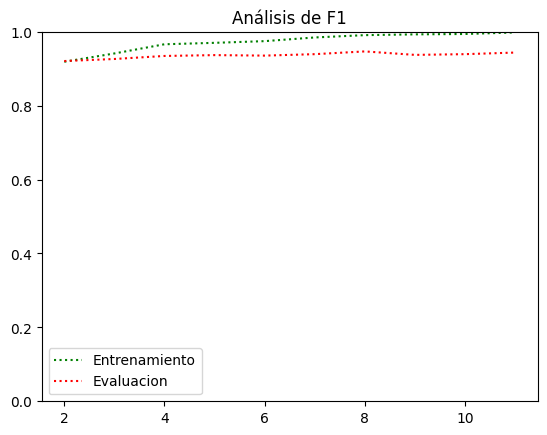

In [ ]:
import matplotlib.pyplot as plt


plt.plot(profundidad,entrenamientoF, linestyle='dotted',label='Entrenamiento', color='green')
plt.plot(profundidad,evaluacionF, linestyle='dotted',label='Evaluacion', color='red')
plt.legend()
plt.title("Análisis de F1")
plt.ylim(0,1)
plt.plot()


# Precision / Recall

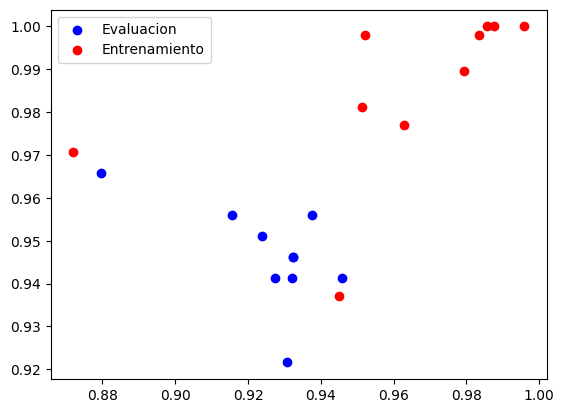

In [ ]:
plt.scatter(evaluacionP,evaluacionR, c= 'blue', label='Evaluacion')
plt.scatter(entrenamientoP, entrenamientoR,  c= 'red', label='Entrenamiento')
plt.legend()
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.show()